# **Modelo de aprendizaje automático entrenado con elementos textuales, emojis y emoticones para la detección de mensajes de ciberacoso en español peruano en la red social X**
#### **Estudiante:** Nicole Maria Morales Robladillo

In [ ]:
!pip install emot
!pip install emoji
!pip install pyspellchecker
!pip install -U deep-translator
!pip install spacy -q
!pip install gensim -q
!python -m spacy download es_core_news_sm -q
!apt-get update
!apt-get install python-dev
!apt-get install -y hunspell-es
!apt-get install libhunspell-dev
!pip install hunspell

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 16.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 ht

In [ ]:
!pip install emoji==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.0
    Uninstalling emoji-2.14.0:
      Successfully uninstalled emoji-2.14.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
import emot
import spacy
import nltk
import seaborn as sns
import gensim
import dask.dataframe as dd
import joblib
import hunspell
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import random
from nltk.corpus import wordnet
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **1. Carga de datos**

**0:** No acoso

**1:** Hostigamiento directo

**2:** Discurso de odio

**3:** Acoso sexual

In [ ]:
def obtenerDataframe(file_id):
  url_file = f'https://drive.google.com/uc?export=download&id={file_id}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'
  df = pd.read_csv(url_file, sep=',', encoding='utf-8')
  df = df.dropna()
  df = df.reset_index(drop=True)
  df['tipo'] = df['tipo'].astype(int)
  return df[['text', 'tipo']]

### **1.3. Nueva data**

#### **1.3.1. Run DRCebAeoxwUrEepn3**

In [ ]:
df_1 = obtenerDataframe('1hIniWmapFkTi-WxFSTrjZw1lXxMajrNh')
df_1

,text,tipo
0,@catasierra01 Entonces abajo 🍑uuuuuufffffffff,3
1,@ClubSwingerPer1 Alaaa que ganas de tenerte as...,3
2,@SashiiHot Uy qué rico BB 🔥🍑🥵,3
3,@majeliskucing @_mujerlunar Venus cuando no sa...,3
4,"@WeraBella69 No sólo tu cabello, también tu ma...",3
5,"@babyofshadows Que tal 🍑, lastima que no hace ...",3


#### **1.3.2. Run pFaZMJwGFCzBwTjLM**

In [ ]:
df_2 = obtenerDataframe('1aw2WptzpEclkMNwI4HgIZVAwCgEJ9vl2')
df_2

,text,tipo
0,@catasierra01 Entonces abajo 🍑uuuuuufffffffff,3
1,@ClubSwingerPer1 Alaaa que ganas de tenerte as...,3
2,@Fredebrocha RICARDA!!!! esas piernas se vería...,3
3,@SashiiHot Uy qué rico BB 🔥🍑🥵,3
4,@ClubSwingerPer1 Alaaa que ganas de tenerte as...,3
5,@Fredebrocha RICARDA!!!! esas piernas se vería...,3
6,@Juls___c Rica tanguita a un costado y full 🍆😋😍😈,3
7,"@Miguelykarla19 Uuufff que rico le entra , que...",3
8,@EsperanzaGomez Te masturbas rico🤤❤️me provoca...,3
9,@EsperanzaGomez Ese culo lo quiero saborear❤️🤤,3


#### **1.3.3. Run tYKaocdO10OYsHUbA**

In [ ]:
df_3 = obtenerDataframe('10ZHs6sMUQ5uMTLJ_ndKPzZxo-Vk8I-e7')
df_3

,text,tipo
0,"@EsperanzaGomez Me gusta, quiero ver toda tu s...",3
1,@EsperanzaGomez Quiero verte tocándote tu deli...,3
2,@prepublicanoPE Chúpame la pija y listo,3
3,@BienSumisa82005 Deja metertela,3
4,@Saturno_code @_Rossee__ @eldiariodedross A pu...,2
...,...,...
100,"@BisexualAct26 Qué ganas de chuparte la pinga,...",3
101,"@BisexualAct26 Qué rica pinga, @BisexualAct26....",3
102,Ese culo se ve duro en los Amiri,3
103,@Sin_Gifs Puta mare tiene las tetas más ricas ...,3


#### **1.3.4. Run EPlbhy2U49G2cO435**

In [ ]:
df_4 = obtenerDataframe('1ilywauXtcnybErJGJOX5FPxW10tPo0dU')
df_4

,text,tipo
0,@Evaalmar Visítame para follarte siempre,3
1,@KarelyRuizxx @karelyruizz33 Porque no me deja...,3
2,@EsperanzaGomez Quiero ver más de tus senos y ...,3
3,@_nickiperrone Me gustan las argentinas por qu...,3
4,@pornworldto @Vladislava661 Rica vagina para c...,3
5,@andigominola Preciosas tetas,3
6,@ValencianosC Que ricas tetas para hacer de todo,3
7,@UltimoxdX Preciosas tetas.,3
8,@UltimoxdX Preciosas tetas.,3
9,"@sonialopcan Mí amor, liberalas para que sea u...",3


#### **1.3.5. Run wY2OABFuSfZWUhlsw**

In [ ]:
df_5 = obtenerDataframe('1QKMuHpou8gyujhU8o6-50yMeBLfCkVON')
df_5

,text,tipo
0,@KikeBernal16 @PedroTejadaG @pacopighi Cholo m...,2
1,@egrojyos @Alissonofabitch @lubianrene eso pas...,2
2,"@CNNEE Esa señora es una feminazi, tipica guer...",2
3,@kronos2160 @pepeabad77 @ultimopaladin No es p...,2
4,LA BASURA FEMINISTA Y FEMINAZI SIGUEN E IDOLAT...,2
...,...,...
276,"@GeldresVictorio @MondonedoDiego Que cabro, qu...",2
277,@altavozpe Pobre rosquete!,2
278,@Maquiavelo1901 Hablabas de Rosquetes negro rc...,2
279,@javierc15957876 @marivpla Te das cuenta que e...,2


#### **1.3.6. Run RhH6flap8ri1ELku4**

In [ ]:
df_6 = obtenerDataframe('1EWwpo90S4dv2vFnhMGvTkm3Ld4c_t9BM')
df_6

,text,tipo
0,debería aprovechar q este huevón quiere regres...,0
1,@maykoolbv @peru21noticias CEO de pensar como ...,0
2,"@_AguilarVictor Víctor Aguilar, estés un rever...",1
3,@omnivorusq Quien no aprovecha su privilegio? ...,0
4,@lenin_elaguila @LucyPN De los creadores del t...,0
...,...,...
188,"Ya cállate, imbécil. No sabes nada de la vida.",1
189,"@Maquiavelo1901 No conocía a ese tal Walo, me ...",1
190,"@manarellidiego Muérete de envidia, vomita bil...",1
191,Dorregaray hijo de puta,1


#### **1.3.7. Run 9VqGnfw65TmCN4hUx**

In [ ]:
df_7 = obtenerDataframe('1QUZuaCPREJfJYurt46GI0DN5F76XMya9')
df_7

,text,tipo
0,@edwarapaza @miykelai Vas a tomar semen,3
1,@Maestra_cuckold como quisiera llenarte con mi...,3
2,"@BisexualAct26 Qué ganas de chuparte la pinga,...",3
3,@BisexualAct26 Qué rico semen 💦 papacito 🤤🤤🤤,3
4,"@BisexualAct26 Qué rica pinga, @BisexualAct26....",3


#### **1.3.8. Run 7IujtGulylJUd6mo4**

In [ ]:
df_8 = obtenerDataframe('135ZqKf128g9a6aXcHNwfeTop56mMlLdw')
df_8

,text,tipo
0,@edgar_javrey @irvinfarpis Nadie se atoró oe r...,1
1,"@_AguilarVictor Víctor Aguilar, estés un rever...",1
2,"@Radical_Vini So pedazo de imbécil, renovarle ...",1
3,"@omnivorusq Para mi eres un pobre imbécil, oja...",1
4,@RubenHood15M Imbecil y propalestino,1
...,...,...
313,@yosoy767 @AvelinoGuilln1 Viejo huevón.,1
314,@Malapalabrero @adrianatudelag @AvanzaPaisOfi ...,1
315,@marianoperez912 pero que cara de imbécil...,1
316,@marianoperez912 pero que cara de imbécil...,1


#### **1.3.9. Run AObSPhxWyCHPBiLXd**

In [ ]:
df_9 = obtenerDataframe('1FhWS1AkrrUgDHV1SLf7CdpuEMvamKAJe')
df_9

,text,tipo
0,@soybortina Que rico culo,3
1,que rico culo que tienes @realmadrid https://t...,3
2,"@candyaxxx Mami , que ricas tetas de chicolate...",3
3,@LizMenendez No sé dónde saliste q llegó una n...,3
4,@alequiroz_ofi Dio mio q ricas tetas tienes Al...,3
5,@DavidChavezBar1 Solo voy a decir que tiene ri...,3
6,@Kitzia_suarez Que ricas tetas,3


#### **1.3.10. Run SeKMUuNwy9NenVYiA**

In [ ]:
df_10 = obtenerDataframe('1SJTApvlWSdvjgX5MUyQ49i6t77TNQ8PB')
df_10

,text,tipo
0,@kchangkyunn Que Rico culo ojala tenerlo en la...,3
1,@LJExhibit @sexyconfesiones @NalgonsotaXXX Wow...,3
2,Algo más rico que un culo peludo? 🥵,3
3,@peeachezzzz Rico culo mi amor 😍😋🍆,3
4,@dannavgv_ Ricas tetas mamasitaaaaa para darle...,3
5,@mcamila0717 Amó ésas ricas tetas mamasitaaaaa...,3
6,@Gringabuffone Un fuerte abrazo a ésas ricas t...,3
7,@LucaVillarrea12 Que ricas tetas mamasitaaaaa.,3
8,@kekereoke Un beso pero a ésas ricas tetas mam...,3
9,@DanielaVilla96 Deseó tener tús ricas tetas ma...,3


#### **1.3.11. Run GpFupmDaUrg1WjsJ9**

In [ ]:
df_11 = obtenerDataframe('1wRuKY5UI-EugVMZmgT2BXQMZO-gtlcnJ')
df_11

,text,tipo
0,@Galope2021 Libera a esas ricas tetas mamasita...,3
1,"@BurroLoco11 No lo sé mí amor, pero lo que sí ...",3
2,@machorrona Una delicia ésas ricas tetas mamas...,3
3,@sexyflabia Me arrechas con ésas ricas tetas m...,3
4,"@hxdzaalnvmnb783 Están en su punto, para meter...",3
5,Clara de huevo medio cruda / Semen calientito ...,3


#### **1.3.12. Run YJWC3VJaeDPTGlw6O**

In [ ]:
df_12 = obtenerDataframe('1VoLl5UOIDIlNcKbR2YZiWQbtt8urIXu7')
df_12

,text,tipo
0,@mayelafueesc Qué rico culo bb para partirlo u...,3
1,@paololatinosex Q rico culo eel activo,3
2,@Rosseliny__ Rico culo mamasitaaaaa.,3
3,@GabriellaVertiz Maltrateme todo lo que tú qui...,3
4,@Isabel66991411 Qué araña a la araña la mató y...,3
5,@angelamg2001 Que rico culo mamasitaaaaa para ...,3
6,@joaquinrenato Tú estabas feliz querías que te...,3


#### **1.3.13. Run 69nHV5QIl2wOZ2LGB**

In [ ]:
df_13 = obtenerDataframe('11reTWsP8Z_X_Dg1dFiN81sV4Y_o44zj9')
df_13

,text,tipo
0,@AbrahamF87906 @FabianoCL1 @YoloAventuras @ElZ...,3
1,@WaykaPeru @CMeganMarino777 LO QUE DICE ESTA M...,3
2,@vida_rentable @Mr_Vinotinto Lo gracioso es qu...,3
3,@AlertaMundoNews Ese veneco cuantas veces le d...,3
4,@moiosme @UKR_token Hay que ser bruto para no ...,3


#### **1.3.14. Run ClPTzbre2xwj6lzLd**

In [ ]:
df_14 = obtenerDataframe('1yBC0SaR2Y_eEcMk4TuAA4IEjYsBT8j0J')
df_14

,text,tipo
0,"@AlertaMundoNews Lógico, nadie puede competir ...",0
1,@Rod5d amigo estamos conectados,0
2,"@UnPataLibre Papasito lindo, me imagino que no...",0
3,@AlejoMunante @larepublica_pe @rlopezaliaga1 L...,0
4,No me quiero quedar con las ganas menos con la...,0
5,@drjaimeguerrero Jajaa no seas pendejo pes tío...,0
6,Donald Trump designa a Brendan Carr como direc...,0
7,@diegosettimo @Thorseidon @aetchebarne @carod2...,0
8,@AlertaNews24 Trompeta le gusta esto?,0
9,@heteroflexibleP @relatosgayperu Denigras el e...,0


#### **1.3.15. Run qVDPvgmAOGTxJ48fD**

In [ ]:
df_15 = obtenerDataframe('1TvM8x4-dZ7E09uJ3xBpBBDCrXnA5XSeM')
df_15

,text,tipo
0,"@matthiasgott El mundo al revés, Matthias! Y m...",0
1,@_Laizak_13 ¿te caigo bien?,0
2,@KrSpeed_ Seria hermoso que tenga un buen final,0
3,"No, gracias. Ya demostró su incapacidad..",0
4,@dardo_noticias @suselparedes @AnahiDurandG @C...,0


#### **1.3.16. Run hmY2qXCdaP9zwqt7B**

In [ ]:
df_16 = obtenerDataframe('11WEdBvs8FotAtD2AmJRrxEEPSEFcT6wD')
df_16

,text,tipo
0,@IDL_Rivera Pero será presidente...,0
1,"@CarlosCornejoA Yo saqué a mi hija de ahí, muc...",2
2,@SeleccionPeru Escucha GRIMALDO dicen que cont...,0
3,@drunkkatemoss Básicamente lo mismo que el tra...,0
4,Estoy harta de que haya gente en mi casa,0
5,@GamesInspector_ Claro https://t.co/cPGF2nr45W,0
6,@Altrightita @RPPNoticias La señora que aún vi...,0


#### **1.3.17. Run thfMonuVkfVhonDMv**

In [ ]:
df_17 = obtenerDataframe('1vOSo8K0kAbdvntZI1uiS3wxXPObJga1b')
df_17

,text,tipo
0,@somoskudasai Eh más o menos,0
1,@ferbelaunzaran @LillyTellez @SheffieldGto Y e...,0
2,@Anythingkid @pskrpskr JAJAJSJAJAQ,0
3,🇵🇪📽️ El Perú se hace presente en la 35ª edició...,0
4,@A_Goyzueta4 Paraguay y venezuela haciendo lo ...,0
5,@huberpflo @Lupita2428 @Anavlisilvana El Rocky...,0
6,Diosito...ese señor debe estar enfermo...esa p...,0
7,@KarmarSale16322 @MemesSV7 Gracias por el abra...,0


#### **1.3.18. Run 4mT4a42PsK8AFKqQq**

In [ ]:
df_18 = obtenerDataframe('1koBV0W4J2qO-AaXygmd-hFgMzC0VKfVX')
df_18

,text,tipo
0,"@RobertoRoig Eso estaba pensando, esos aviones...",0
1,@brandonmtoruno @LaHuellaSV @nayibbukele Puede...,0
2,Ovación Edición Central por RADIO OVACION http...,0


#### **1.3.19. Run NJzsD4IVi0b3hdbwr**

In [ ]:
df_19 = obtenerDataframe('1hTpMmGz7p_546R9UjqJz5AsGrZbVOlM4')
df_19

,text,tipo
0,Soy diseñadora de Oster y me encantan sus prod...,0
1,"@marissachiappe Jajaja, amo",0
2,Yo pienso igual que Galliani. Mejor dicho impo...,0
3,Sin dudas amo este fandom jajajaja ptm me reí ...,0
4,mi adolescente interior está brincando! los amo 😭,0
5,amo a Gaga pero su actuación nunca es buena pa...,0
6,Amo mucho a mi novio😭😭😭😭,0
7,@iam_byunghun Te amo ❤️,0
8,amo ser yop,0


#### **1.3.20. Run PXdcfjnZdnVaY5YCe**

In [ ]:
df_20 = obtenerDataframe('1E4v6-Q2rjeu6UMkrUnpm4m5XJnkRGOrp')
df_20

,text,tipo
0,Aun no me lo creo☺ Dios que nervios todavía es...,0
1,@EliasZamoranoCL @LauraAguilar68 Tengo ambos ☺,0
2,Linda foto de puesta de sol en Estambul ☺\n\n#...,0
3,@Krysc23 Tienen que ir a la barra para que eso...,0


#### **1.3.21. Run V5yHBt5JZEsQYxPRc**

In [ ]:
df_21 = obtenerDataframe('10I9Ilrjik1gI-7x7O-wDRIX4Ib-pdWWD')
df_21

,text,tipo
0,𝗟𝗢𝗦 𝗕𝗜𝗖𝗔𝗠𝗣𝗘𝗢𝗡𝗘𝗦 𝗟𝗟𝗘𝗚𝗔𝗥𝗢𝗡 𝗔 𝗦𝗨 𝗙𝗜𝗘𝗦𝗧𝗔 🥳🎉\n\n#Bi...,0
1,"@TheTopComics Se ve espectacular, ¡me encantó!...",0
2,Tremenda extensión de trailer 😅. Va a ser abur...,0
3,Luego de una larga temporada... ¡ES DÍA DE CEL...,0
4,¡Queremos saber cuántos están interesados en l...,0
5,🥰 UN DÍA JUNTO A ... FÁTIMA AGUILAR 🥳\n\nPasam...,0
6,⚽️💥 ¡JEAN FERRARI te invita a la TRINCHERA FES...,0
7,Hacer las ppt para mis clases virtuales 🤢🤧😴\nI...,0
8,¡Agradecemos a #RQTAdvertising por su particip...,0
9,"@RaulAsencio7 Felicitaciones por el debut, jug...",0


#### **1.3.22. Run dQ28untxR54F6m9yU**

In [ ]:
df_22 = obtenerDataframe('1TaZj1S45Tb1q9Lctdwd6TYq2tmmxTvMU')
df_22

,text,tipo
0,Todo está en tus manos señor Jesús🙏 🙌 ✨️,0
1,@delfines8363 Mucha fortaleza en los momentos ...,0
2,@DANTE_eloficial Amén 🙏🙏🙏,0
3,@hombredeltiempo Me gusto la última parte : Me...,0
4,Alguien me pasa algún link para ver el 24/7 po...,0
5,"@sylvyala Tranquila, todo saldrá bien. Yo pasé...",0
6,HOY DOMINGO 17 DE NOVIEMBRE ES NUESTRO SORTEO ...,0
7,👍Oliver Sonne confía en la selección y mandó m...,0
8,¡𝐒𝐄 𝐂𝐎𝐌𝐏𝐑𝐎𝐌𝐄𝐓𝐄! 🥹🙏🇵🇪\nWilder Cartagena envió m...,0
9,@_ToLoveRu1 Gracias Lala por traer al cast pri...,0


#### **1.3.23. Run rvPPlYhMDpnwcn7dw**

In [ ]:
df_23 = obtenerDataframe('1d-Os3kRIpScSyW6grxR0OYmOQpGlM526')
df_23

,text,tipo
0,"Con ustedes, ¡el anime del año!\n#DANDADAN\n\n...",0
1,@dakitidami No es tanto el outfit es mas ese c...,0
2,"Hicimos una competencia con NamJoon y bueno, y...",0
3,@QuidVacuo Confío en que 'Ironheart' tenga el ...,0
4,Lo bella que está la luna hoy ✨🤍,0
5,"@MuniDeMagdalena ,me había olvidado de la exis...",0
6,@JulioCe08089174 @crunchyroll_la Los actores n...,0
7,Internet durante estas semanas: https://t.co/x...,0


#### **1.3.24. Run SP44q0bxoIjIlIV3j**

In [ ]:
df_24 = obtenerDataframe('1TxtJfLOAxxZ0y63auDnHu8wr0kL-kG6-')
df_24

,text,tipo
0,@MerengueJapon Jajajajaja Algún día 😃,0
1,@LassoMusica Felicidades. Ya eres papá 😃,0
2,Atención!!!😃,0
3,@CodigoCrema @_AguilarVictor Está hablando de ...,0
4,"@joanahdez71 No, la edad no importa, luces gen...",0
5,Pasen a ver la vitrina 😃\nID: 9059017058600862...,0
6,Y bendecido Domingo 😃 una red amada y bendecid...,0
7,"Cada 13 de noviembre, celebramos la historia d...",0
8,Tendría que llevar foto a Hae y preguntar si f...,0
9,@ChacoteroPeru Más trenes 🚊… que bueno 😃,0


#### **1.3.25. Run bHASsLmpI4j3TnMI4**

In [ ]:
df_25 = obtenerDataframe('1M3sp8Ch5z7wjHXEtt9beIUfsR92mYFnq')
df_25

,text,tipo
0,@KiaFrutigerBean Felicidades mamu 😺🥳🎉🎊,0
1,Una maravilla 🤩,0


#### **1.3.26. Run rdUbTQpgM3bQUrBya**

In [ ]:
df_26 = obtenerDataframe('1Vu1TdUrE_9dk0M-2ZK6z5AQGZnOn7Ctp')
df_26

,text,tipo
0,Banderazo Vinotinto en Santiago.\nHotel Sherat...,0
1,"@tuiterarondera ""Lo que pasó paso...""🎶",0
2,Tu primera vez?\n👀\nEsta fue mi primera colabo...,0
3,@SerenadeUniv Hermoso aunque le falta un poco ...,0
4,@Alto_Invassion1 Parece caballo de carreras,0
5,Solo necesitamos que nos dediquen canciones de...,0
6,🤩🎶 #este #14 de #diciembre es la #fecha #imper...,0
7,Nada nada si no estás 🎶,0
8,"Señor, yo quiero levantar mi voz\nQuiero agrad...",0
9,"Dios, el más grande y digno de alabar\nYo veng...",0


#### **1.3.27. Run a7U4tdLLHupR0Zh5B**

In [ ]:
df_27 = obtenerDataframe('1_qA1_dn7cGUM9Vo-BU774RIwGyAYEyMl')
df_27

,text,tipo
0,Más lindo 💖✨️,0
1,¡El sábado 23 de noviembre ven al Día De Apadr...,0
2,"Ay, las chilenitas que se lograron encontrar c...",0
3,Pero qué bonito ir a un matri con tu novio y b...,0
4,"MAGISTRAL 💖💯.\nVolvió #Arcane y TODO mejoró, c...",0
5,Pero miren nada más a esos 2 príncipes y 1 rei...,0
6,@NoNubesConQueso @Candle3cfffff Feliz 15 anive...,0
7,"Comentario x aparte, me encanta que Ping igual...",0
8,"Mi lindo sunshine, todo un romántico 💖💖💖💖",0
9,pero vale y valdrá la penaaaaaaaaaaa 💖,0


#### **1.3.28. Run OJCKDLO9qidpCB0mk**

In [ ]:
df_28 = obtenerDataframe('13lD5fQ6lz7nyi18bgN9l_hvhKDFQ4dSO')
df_28

,text,tipo
0,"@maps_black Italia, en una casa de campo en la...",0
1,yop hoy toda la tarde,0
2,@w4terparty Soy el de la pizza 🍕😏,0
3,@latalarena Mitad peperoni y mitad suprema 🍕,0
4,que tal bajoncito,0
5,Corran!! 🍕🍕🍕🍕🍕,0
6,lindo sábado fue un curita al cora❤️‍🩹,0
7,🏬🍕Este innovador formato hot n’ ready ofrece a...,0
8,@PadreTomasB Jajajaja 😁 bendiciones 🙏🏻 disfrut...,0
9,Proyecto Fotográfico Roomies: Un viaje hacia e...,0


### **1.4. Concatenar tablas**

In [ ]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23, df_24, df_25, df_26, df_27, df_28])
df = df.dropna()
df = df.drop_duplicates()
df['tipo'] = df['tipo'].astype(str)
df['tweet'] = df['text'].apply(lambda x: str(x))
df = df.drop('text', axis=1)
df = df.reset_index(drop=True)
df

,tipo,tweet
0,3,@catasierra01 Entonces abajo 🍑uuuuuufffffffff
1,3,@ClubSwingerPer1 Alaaa que ganas de tenerte as...
2,3,@SashiiHot Uy qué rico BB 🔥🍑🥵
3,3,@majeliskucing @_mujerlunar Venus cuando no sa...
4,3,"@WeraBella69 No sólo tu cabello, también tu ma..."
...,...,...
963,0,Corran!! 🍕🍕🍕🍕🍕
964,0,lindo sábado fue un curita al cora❤️‍🩹
965,0,🏬🍕Este innovador formato hot n’ ready ofrece a...
966,0,@PadreTomasB Jajajaja 😁 bendiciones 🙏🏻 disfrut...


In [ ]:
def back_translation(text, src_lang='es', target_lang='en'):
    translated = GoogleTranslator(source=src_lang, target=target_lang).translate(text)
    retranslated = GoogleTranslator(source=target_lang, target=src_lang).translate(text)
    return retranslated

def random_insertion(text, n=2):
    words = text.split()
    for _ in range(n):
        index = random.randint(0, len(words))
        words.insert(index, random.choice(['hola', 'por', 'favor', 'gracias']))
    return ' '.join(words)

def synonym_replacement(text, n=1):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_to_replace = random.choice(words)
        synonyms = wordnet.synsets(word_to_replace)
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_words = [synonym if word == word_to_replace else word for word in new_words]
    return ' '.join(new_words)

df['augmented_tweet_1'] = df['tweet'].apply(lambda x: random_insertion(x, n=2))
df['augmented_tweet_2'] = df['tweet'].apply(lambda x: synonym_replacement(x, n=2))
df['augmented_tweet_3'] = df['tweet'].apply(lambda x: back_translation(x))

augmented_df = pd.concat([df, df[['tipo', 'augmented_tweet_1']].rename(columns={'augmented_tweet_1': 'tweet'}),
                          df[['tipo', 'augmented_tweet_2']].rename(columns={'augmented_tweet_2': 'tweet'}),
                          df[['tipo', 'augmented_tweet_3']].rename(columns={'augmented_tweet_3': 'tweet'})])

df = augmented_df.reset_index(drop=True)

In [ ]:
df = augmented_df[['tweet', 'tipo']]
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df

,tweet,tipo
0,@catasierra01 Entonces abajo 🍑uuuuuufffffffff,3
1,@ClubSwingerPer1 Alaaa que ganas de tenerte as...,3
2,@SashiiHot Uy qué rico BB 🔥🍑🥵,3
3,@majeliskucing @_mujerlunar Venus cuando no sa...,3
4,"@WeraBella69 No sólo tu cabello, también tu ma...",3
...,...,...
3867,¡¡¡Corran!!! 🍕🍕🍕🍕🍕,0
3868,lindo sábado fue un curita al cora❤️‍🩹,0
3869,🏬🍕Este innovador formato hot n’ ready ofrece a...,0
3870,@PadreTomasB Jajajaja 😁 bendiciones 🙏🏻 disfrut...,0


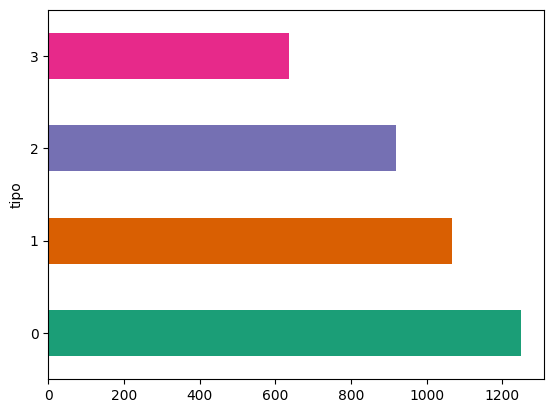

In [ ]:
df.groupby('tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
grouped_data = df.groupby('tipo').size()
grouped_data

,0
tipo,
0,1248
1,1068
2,920
3,636


## **2. Preprocesamiento**

### **2.1. Corregir ortografía**

In [ ]:
hs = hunspell.HunSpell('/usr/share/hunspell/es_PE.dic', '/usr/share/hunspell/es_PE.aff')

def corregirOrtografia(texto):
  palabras = texto.split()
  texto_corregido = []
  for palabra in palabras:
    if not hs.spell(palabra):
      correccion = hs.suggest(palabra)
      if correccion:
        texto_corregido.append(correccion[0])
      else:
        texto_corregido.append(palabra)
    else:
      texto_corregido.append(palabra)
  return ' '.join(texto_corregido)

In [ ]:
df.tweet = df.tweet.apply(corregirOrtografia)
df

,tweet,tipo
0,motosierra Entonces abajo 🍑uuuuuufffffffff,3
1,@ClubSwingerPer1 Alana que ganas de tenerte as...,3
2,@SashiiHot Uy qué rico BV 🔥🍑🥵,3
3,@majeliskucing mujerzuela Venus cuando no sabe...,3
4,encabellar No sólo tu cabello también tu manza...,3
...,...,...
3867,socorrano 🍕🍕🍕🍕🍕,0
3868,lindo sábado fue un curia al cora❤️‍🩹,0
3869,🏬🍕Este innovador formato hoy ne reyad ofrece a...,0
3870,padrenuestro Jalajala 😁 bendiciones 🙏🏻 disfrut...,0


### **2.2. Añadir espacio entre emojis**

In [ ]:
def espacioEntreEmojis(text):
  emojis = [char for char in text if char in emoji.EMOJI_DATA]
  for emoji_char in emojis:
    pattern = re.escape(emoji_char)
    text = re.sub(f'({pattern})', r' \1 ', text)
  return text

In [ ]:
df.tweet = df.tweet.apply(espacioEntreEmojis)
df

### **2.3. Añadir espacio entre emoticones**

In [ ]:
def espacioEntreEmoticones(text):
  emoticones = [char for char in text if char in emot.EMOTICONS_EMO.keys()]
  for emoticon in emoticones:
    pattern = re.escape(emoticon)
    text = re.sub(f'({pattern})', r' \1 ', text)
  return text

In [ ]:
df.tweet = df.tweet.apply(espacioEntreEmoticones)
df

### **2.4. Reemplazar cada emoji con su significado en español**

In [ ]:
def translate_emoji_to_spanish(emoji_description):
    translation = GoogleTranslator(source='en', target='es').translate(emoji_description)
    return translation

def emoji2description(text):
    return emoji.replace_emoji(
        text,
        replace=lambda chars, data_dict: translate_emoji_to_spanish(' '.join(data_dict.get('en', chars).split('_')).strip(':'))
    )

In [ ]:
df.tweet = df.tweet.apply(emoji2description)
df

,tweet,tipo
0,motosierra Entonces abajo durazno uuuuuufffff...,3
1,@ClubSwingerPer1 Alana que ganas de tenerte as...,3
2,@SashiiHot Uy qué rico BV fuego durazno car...,3
3,@majeliskucing mujerzuela Venus cuando no sabe...,3
4,encabellar No sólo tu cabello también tu manza...,3
...,...,...
3867,socorrano pizza pizza p...,0
3868,lindo sábado fue un curia al cora corazón rojo...,0
3869,grandes almacenes pizza Este innovador forma...,0
3870,padrenuestro Jalajala Cara radiante con ojos ...,0


### **2.5. Reemplazar cada emoticon con su significado en español**

In [ ]:
def emoticon2description(text):
  emot_obj = emot.core.emot()
  info_emoticonos = emot_obj.emoticons(text)
  valores_emoticonos = info_emoticonos['value']
  for i in range(len(info_emoticonos['value'])):
    ubicaciones_emoticonos = info_emoticonos['location'][0]
    significados_emoticonos = info_emoticonos['mean'][0]
    significados_emoticonos = GoogleTranslator(source='en', target='es').translate(text=significados_emoticonos).lower()
    text = text[:ubicaciones_emoticonos[0]] + significados_emoticonos + text[ubicaciones_emoticonos[1]:]
    info_emoticonos = emot_obj.emoticons(text)
  return text

In [ ]:
df.tweet = df.tweet.apply(emoticon2description)
df

### **2.6. Pasar texto a minúscula**

In [ ]:
def lower(text):
  return text.lower()

In [ ]:
df.tweet = df.tweet.apply(lower)
df

### **2.7. Remoción de etiquetas o hashtags**

In [ ]:
def removerEtiquetas(text):
  return re.sub(r'#\w+', '', text)

In [ ]:
df.tweet = df.tweet.apply(removerEtiquetas)
df

### **2.8. Remoción de menciones a usuarios**

In [ ]:
def removerMenciones(text):
  return re.sub(r'@\w+', '', text)

In [ ]:
df.tweet = df.tweet.apply(removerMenciones)
df

### **2.9. Remoción de URLs**

In [ ]:
def removerUrls(text):
  return re.sub(r'http\S+', '', text)

In [ ]:
df.tweet = df.tweet.apply(removerUrls)
df

### **2.10. Remoción de los números**

In [ ]:
def removerNumeros(text):
  return re.sub(r'\d+', '', text)

In [ ]:
df.tweet = df.tweet.apply(removerNumeros)
df

### **2.11. Remoción de los signos de puntuación**

In [ ]:
def removerSignosPuntuacion(text):
  return re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ\s]', '', text)

In [ ]:
df.tweet = df.tweet.apply(removerSignosPuntuacion)
df

### **2.12. Remoción de los espacios extra**

In [ ]:
def eliminarEspaciosExtra(text):
  text = re.sub(r'[\r\t\n]', ' ', text)
  text = re.sub(r'\s{2,}', ' ', text)
  return text

In [ ]:
df.tweet = df.tweet.apply(eliminarEspaciosExtra)
df

### **2.13. Remoción de los caracteres repetitivos**

In [ ]:
def eliminarCaracteresRepetitivos(texto):
  palabras_permitidas = {'rr', 'll', 'cc', 'ee', 'oo'}
  patron = re.compile(r'(\w)\1+')
  def reemplazo(match):
    char = match.group(1)
    repetido = match.group(0)
    if char * 2 in palabras_permitidas:
      if len(repetido) > 2:
        return char * 2
      else:
        return repetido
    else:
      return char
  texto_modificado = patron.sub(reemplazo, texto)
  return texto_modificado

In [ ]:
df.tweet = df.tweet.apply(eliminarCaracteresRepetitivos)
df

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)